In [332]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

df = pd.read_csv("synthetic_dataset.csv")

## Estimación de Parámetros con OLS

In [333]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,4.967142,-1.382643,NaN,15.230299,-2.341534,-2.341370,15.792128,7.674347,-4.694744,5.425600,-4.634177,-4.657298,2.419623,-19.132802,-17.249178,152.273643
1,-5.622875,-10.128311,3.142473,-9.080241,-14.123037,14.656488,-2.257763,NaN,-14.247482,-5.443827,1.109226,-11.509936,3.756980,-6.006387,-2.916937,144.947630
2,-6.017066,18.522782,-0.134972,-10.577109,8.225449,NaN,2.088636,-19.596701,-13.281860,1.968612,7.384666,1.713683,-1.156483,-3.011037,-14.785220,188.449076
3,-7.198442,-4.606388,NaN,3.436183,-17.630402,3.240840,-3.850823,-6.769220,6.116763,10.309995,9.312801,NaN,-3.092124,3.312634,9.755451,107.875692
4,-4.791742,-1.856590,-11.063350,-11.962066,8.125258,13.562400,-0.720101,10.035329,3.616360,-6.451198,3.613956,15.380366,-0.358260,15.646437,-26.197451,-78.724744


In [334]:
print(df.isnull().sum())

X1     205
X2     202
X3     210
X4     222
X5     210
X6     195
X7     185
X8     193
X9     195
X10    195
X11    189
X12    198
X13    211
X14    198
X15    192
Y        0
dtype: int64


In [335]:
total_datos = 4000 
print(f"Total de datos: {total_datos}")

X1 = (205 / total_datos) * 100
X2 = (202 / total_datos) * 100
X3 = (210 / total_datos) * 100
X4 = (222 / total_datos) * 100
X5 = (210 / total_datos) * 100

print(f"El porcentaje que representan de datos nulos en cada una de las categorías son los siguientes:\n"
      f"X1: {X1:.2f}%\n"
      f"X2: {X2:.2f}%\n"
      f"X3: {X3:.2f}%\n"
      f"X4: {X4:.2f}%\n"
      f"X5: {X5:.2f}%\n"
)

Total de datos: 4000
El porcentaje que representan de datos nulos en cada una de las categorías son los siguientes:
X1: 5.12%
X2: 5.05%
X3: 5.25%
X4: 5.55%
X5: 5.25%



## Normalización

In [336]:
numerical_cols = np.array(["X1", "X2", "X3", "X4", "X5"])
for col in numerical_cols:  
    if col in df.columns:  
        stat, p_value = stats.normaltest(df[col].dropna())  
        print(f" {col}: Estadístico = {stat}, p-valor = {p_value}")

        if p_value < 0.05:
            print(" Los datos NO siguen una distribución normal.\n")
        else:
            print(" Los datos siguen una distribución normal.\n")
    else:
        print(f" La columna '{col}' no existe en el DataFrame.\n")

 X1: Estadístico = 3.165120884485229, p-valor = 0.20544838545904986
 Los datos siguen una distribución normal.

 X2: Estadístico = 1.107147111082594, p-valor = 0.5748917277151018
 Los datos siguen una distribución normal.

 X3: Estadístico = 0.8312062793277601, p-valor = 0.6599421233743414
 Los datos siguen una distribución normal.

 X4: Estadístico = 1.0703099682544395, p-valor = 0.5855785277345695
 Los datos siguen una distribución normal.

 X5: Estadístico = 3.4799554217609905, p-valor = 0.17552431285578177
 Los datos siguen una distribución normal.



Si el porcentaje de valores faltantes es 5%, lo ideal es imputarlos en lugar de eliminarlos para no perder información. En este caso, utilizaremos la imputación con la media, ya que es una estrategia efectiva cuando los datos siguen una distribución aproximadamente normal y no presentan valores atípicos significativos.

Para imputar los valores faltantes con la media en un DataFrame de pandas, puedes usar el siguiente código:

In [337]:
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
Y      0
dtype: int64


Text(0.5, 1.0, 'Matriz de Correlación')

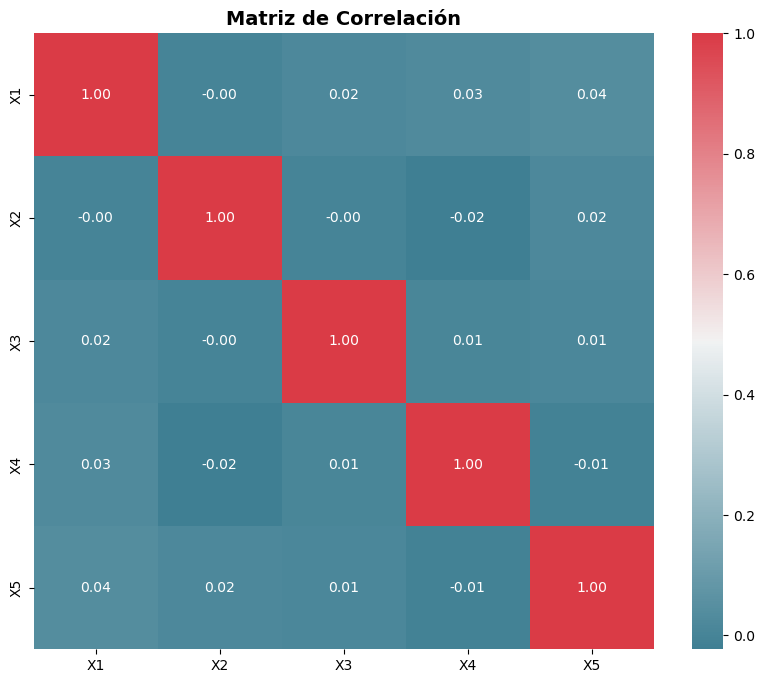

In [338]:
columnas = ['X1', 'X2', 'X3',  'X4','X5' ]

corr_mat = df[columnas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
plt.title("Matriz de Correlación", fontsize=14, fontweight="bold")

## Numpy

In [339]:
import numpy as np

X = df[["X1", "X2", "X3", "X4", "X5"]].values
y = df["Y"].values

# Agregar columna de unos para el término independiente (β0)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Añade una columna de unos a X

# 3️⃣ Cálculo de los coeficientes usando la fórmula OLS: β = (XᵀX)⁻¹ Xᵀy
XT_X = X_b.T @ X_b  # Multiplicación de la transpuesta de X por X

XT_X_inv = np.linalg.inv(XT_X)  # Inversa de (XᵀX)

XT_y = X_b.T @ y  # Multiplicación de la transpuesta de X por y

beta = XT_X_inv @ XT_y  # Cálculo final de los coeficientes

print(f"Coeficientes estimados (β):\n")
print(f"β0 (Intercepto): {beta[0]:.4f}")
print(f"β1 (X1): {beta[1]:.4f}")
print(f"β2 (X2): {beta[2]:.4f}")
print(f"β3 (X3): {beta[3]:.4f}")
print(f"β4 (X4): {beta[4]:.4f}")
print(f"β5 (X5): {beta[5]:.4f}")

Coeficientes estimados (β):

β0 (Intercepto): -0.9999
β1 (X1): -2.9919
β2 (X2): 4.5712
β3 (X3): 4.8661
β4 (X4): 0.5465
β5 (X5): -3.2882


Comprobar modelo obtenido por medio de la libreria (stasmodel)

In [340]:
import statsmodels.api as sm
import pandas as pd

# Suponiendo que tienes un DataFrame llamado df con variables "X" y "y"
X = df[["X1", "X2", "X3", "X4", "X5"]].values  # Variable independiente (predictor)
y = df['Y'].values  # Variable dependiente (objetivo)

# Agregar una constante para el término de intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
modelo = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     535.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:52:19   Log-Likelihood:                -23886.
No. Observations:                4000   AIC:                         4.778e+04
Df Residuals:                    3994   BIC:                         4.782e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9999      1.502     -0.666      0.5

##  Estimación de Parámetros con Gradient Descent 

Los coeficientes (θ), que inicialmente se pueden establecer en 0 o valores aleatorios.

La tasa de aprendizaje (α), que determina cuánto cambian los coeficientes en cada iteración.

El número de iteraciones (epochs), que define cuántas veces se actualizarán los coeficientes.

In [341]:
X = np.c_[np.ones(X.shape[0]), X]  

theta = np.zeros(X.shape[1])  

alpha = 0.01  # Tasa de aprendizaje
epochs = 1000  # Número de iteraciones

print("Paso 1 - Datos y parámetros iniciales:")
print("X con bias:\n", X)
print("y:\n", y)
print("Theta inicial:", theta)

Paso 1 - Datos y parámetros iniciales:
X con bias:
 [[  1.           1.           4.96714153 ...   0.17416585  15.23029856
   -2.34153375]
 [  1.           1.          -5.62287529 ...   3.14247333  -9.08024076
  -14.12303701]
 [  1.           1.          -6.01706612 ...  -0.13497225 -10.57710929
    8.22544912]
 ...
 [  1.           1.           7.87651287 ...   3.77975684   0.2359561
   -1.33503315]
 [  1.           1.          19.51254434 ...  19.37021313  -1.25082575
    5.89664406]
 [  1.           1.           7.64050782 ...  -2.73401072  -2.59206311
    2.74768867]]
y:
 [152.27364346 144.94763031 188.44907577 ...  41.76648087  18.26986345
 -27.13913431]
Theta inicial: [0. 0. 0. 0. 0. 0. 0.]


Definir la función de costo (MSE)
Se define la función de costo.

In [342]:
def compute_cost(X, y, theta):
    m = len(y)  # Número de datos
    y_pred = X.dot(theta)  # Predicciones
    error = y_pred - y  # Error
    cost = (1/(2*m)) * np.sum(error**2)  # MSE
    return cost

print("Paso 2 - Cálculo de costo inicial:", compute_cost(X, y, theta))

Paso 2 - Cálculo de costo inicial: 7518.21802432855


Calcular el gradiente
Se calcula la derivada de la función de costo con respecto a los coeficientes.

In [343]:
def compute_gradient(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)  # Predicciones
    error = y_pred - y  # Error
    gradient = (1/m) * X.T.dot(error)  # Gradiente
    return gradient

print("Paso 3 - Gradiente inicial:", compute_gradient(X, y, theta))

Paso 3 - Gradiente inicial: [   0.48823699    0.48823699  299.5275933  -427.41809279 -450.36347109
  -40.04651997  294.93589831]


Actualizar los coeficientes
Se ajustan los coeficientes usando la regla de actualización de Gradient Descent.

In [344]:
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = []  # Guardar la evolución del costo

    for i in range(epochs):
        gradient = compute_gradient(X, y, theta)  # Calcular gradiente
        theta -= alpha * gradient  # Actualizar parámetros
        cost = compute_cost(X, y, theta)  # Calcular costo después de la actualización
        cost_history.append(cost)

        if i % 100 == 0:  # Mostrar cada 100 iteraciones
            print(f"Iteración {i}: Costo = {cost:.4f}, Theta = {theta}")

    return theta, cost_history

print("Paso 4 - Ejecutando Gradient Descent...")
theta_final, cost_history = gradient_descent(X, y, theta, alpha, epochs)
print("Theta final después de Gradient Descent:", theta_final)

Paso 4 - Ejecutando Gradient Descent...
Iteración 0: Costo = 4518.1019, Theta = [-0.00488237 -0.00488237 -2.99527593  4.27418093  4.50363471  0.4004652
 -2.94935898]
Iteración 100: Costo = 4501.3917, Theta = [-0.43415165 -0.43415165 -2.99171084  4.57137821  4.86589094  0.54643811
 -3.28824317]


Iteración 200: Costo = 4501.3832, Theta = [-0.49118988 -0.49118988 -2.99189516  4.57120735  4.86610764  0.54650023
 -3.2881659 ]
Iteración 300: Costo = 4501.3831, Theta = [-0.49876731 -0.49876731 -2.99191965  4.57118466  4.86613643  0.54650848
 -3.28815563]
Iteración 400: Costo = 4501.3831, Theta = [-0.49977396 -0.49977396 -2.9919229   4.57118164  4.86614025  0.54650958
 -3.28815427]
Iteración 500: Costo = 4501.3831, Theta = [-0.49990769 -0.49990769 -2.99192333  4.57118124  4.86614076  0.54650972
 -3.28815409]
Iteración 600: Costo = 4501.3831, Theta = [-0.49992546 -0.49992546 -2.99192339  4.57118119  4.86614083  0.54650974
 -3.28815406]
Iteración 700: Costo = 4501.3831, Theta = [-0.49992782 -0.49992782 -2.9919234   4.57118118  4.86614084  0.54650974
 -3.28815406]
Iteración 800: Costo = 4501.3831, Theta = [-0.49992813 -0.49992813 -2.9919234   4.57118118  4.86614084  0.54650974
 -3.28815406]
Iteración 900: Costo = 4501.3831, Theta = [-0.49992817 -0.49992817 -2.9919234   4.57118118  4.866

Evaluar la convergencia
Se grafica la evolución del costo para ver si converge correctamente.

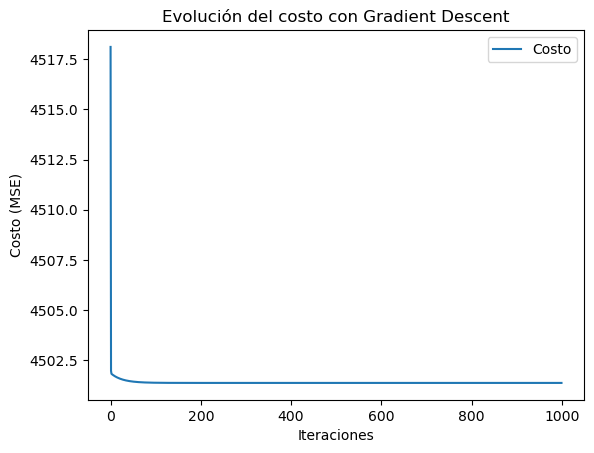

In [345]:

plt.plot(range(len(cost_history)), cost_history, label="Costo")
plt.xlabel("Iteraciones")
plt.ylabel("Costo (MSE)")
plt.title("Evolución del costo con Gradient Descent")
plt.legend()
plt.show()

In [346]:
X = df[["X1", "X2", "X3", "X4", "X5"]].values  # Variable independiente
y = df['Y'].values    # Variable dependiente

# Agregar una columna de unos para el término de intercepción (bias)
X = np.c_[np.ones(X.shape[0]), X]  # Agregar columna de 1s

# Inicializar parámetros (beta0 = bias, beta1 = coeficiente de X)
theta = np.zeros(X.shape[1])  

# Hiperparámetros
alpha = 0.01  # Tasa de aprendizaje
epochs =1000 # Número de iteraciones

# Algoritmo de Gradient Descent
m = len(y)  # Número de observaciones

for i in range(epochs):
    y_pred = X.dot(theta)  # Predicción
    error = y_pred - y
    gradient = (1/m) * X.T.dot(error)  # Derivada de la función de costo
    theta -= alpha * gradient  # Actualizar los coeficientes

# Mostrar los parámetros finales estimados
print(f"Parámetros estimados: {theta}")

Parámetros estimados: [-0.9998126  -2.99192333  4.57118124  4.86614076  0.54650972 -3.28815409]
